In [1]:
from monai.utils import set_determinism
import torch
import matplotlib.pyplot as plt
import nrrd
import munch
import yaml

# set fixed seed for comparability
set_determinism(seed=0, additional_settings=None)

In [42]:
from trainer_own import LitModel
from datamodule_own import ASOCADataModule, CustomDataset

cwd = "/cluster/work/felixzr/TDT4265_StarterCode_2024/pytorch-lightning-template/"
config = munch.munchify(yaml.load(open(cwd + "config_copy.yaml"), Loader=yaml.FullLoader))

# model = LitModel.load_from_checkpoint(checkpoint_path="checkpoints/ASOCA/ASOCA_idun/best_model:epoch=32-val_acc=0.0000.ckpt", config=config)
model = LitModel.load_from_checkpoint(checkpoint_path="checkpoints/ASOCA/ASOCA_idun/best_model:epoch=32-val_acc=0.0011.ckpt", config=config)
model.eval() ## set to evaluation mode

LitModel(
  (model): UNet(
    (model): Sequential(
      (0): ResidualUnit(
        (conv): Sequential(
          (unit0): Convolution(
            (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
            (adn): ADN(
              (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (D): Dropout(p=0.0, inplace=False)
              (A): PReLU(num_parameters=1)
            )
          )
          (unit1): Convolution(
            (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
            (adn): ADN(
              (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (D): Dropout(p=0.0, inplace=False)
              (A): PReLU(num_parameters=1)
            )
          )
        )
        (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      )
      (1): SkipConnection(
        (submodule): 

In [43]:
dm = ASOCADataModule(
    data_dir=config.data_dir,
    batch_size=1, #config.batch_size,
    num_workers=config.num_workers,
    train_split_ratio=config.train_split_ratio,
    data_root=config.data_root
)
dm.setup()
dataloader = dm.test_dataloader()

In [44]:
device = "cuda"
model.to(device)

predictions = []
with torch.no_grad():
    for inputs in dataloader:
        # print("TEST")
        outputs = model.forward(inputs["sample"].to(device))
        predictions.append(outputs)

len(predictions)

1

In [45]:
predictions[0].shape

torch.Size([1, 1, 512, 512, 224])

In [46]:
# predictions[1].shape

In [47]:
data, _ = nrrd.read("/cluster/work/felixzr/TDT4265_StarterCode_2024/data/ASOCA/Normal/CTCA/Normal_8.nrrd")
data_gt, _ = nrrd.read("/cluster/work/felixzr/TDT4265_StarterCode_2024/data/ASOCA/Normal/Annotations/Normal_8.nrrd")

data_gt.shape

In [ ]:
predictions_plot = predictions[0][0][0].cpu()

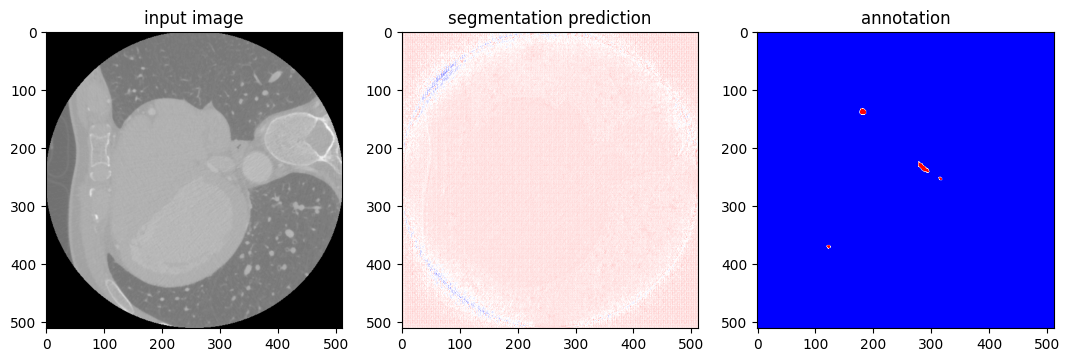

In [ ]:
i = 100

fig, axs = plt.subplots(1, 3, figsize=(13, 4))

axs[0].set_title("input image")
axs[0].imshow(data[:, :, i], cmap="gray")

axs[1].set_title("segmentation prediction")
axs[1].imshow(predictions_plot[:,:,i], cmap="bwr")

axs[2].set_title("annotation")
axs[2].imshow(data_gt[:,:,i], cmap="bwr")

In [ ]:
torch.min(predictions[0]).item(), torch.max(predictions[0]).item(), torch.mean(predictions[0]).item(), torch.median(predictions[0]).item(), torch.std(predictions[0]).item()

(-10.87293815612793,
 19.13162612915039,
 0.16669896245002747,
 -0.0004750145599246025,
 0.8593046069145203)

In [ ]:
predictions_plot

metatensor([[[ 3.7076e-01,  2.3878e-01, -3.4974e-01,  ...,  8.4926e-02,
          -9.5068e-02,  2.9391e-01],
         [ 7.0850e-01,  1.3519e-01,  6.7388e-01,  ..., -2.0105e-01,
           1.7591e-01, -3.8423e-02],
         [ 2.4220e-01,  6.7066e-01, -2.5875e-01,  ...,  3.5709e-01,
          -5.2691e-02, -1.2806e-01],
         ...,
         [ 3.2892e-01,  1.0702e-01,  5.2237e-01,  ..., -1.3969e-01,
           1.9332e-01,  1.0169e-01],
         [ 4.8142e-01,  4.7593e-01, -7.9387e-02,  ...,  5.5067e-01,
           1.1393e-01, -6.3995e-03],
         [-3.0521e-01,  1.2383e-01, -6.0807e-02,  ..., -1.0213e-01,
           2.0112e-01,  1.2112e-01]],

        [[ 6.7565e-02,  5.8520e-01, -1.2507e-02,  ...,  3.3364e-01,
           1.1404e-01, -1.2038e-01],
         [ 3.2819e-01,  1.1070e+00,  5.6138e-02,  ...,  3.0023e-01,
           3.9313e-02,  3.8117e-01],
         [-1.3841e-01, -2.5390e-01,  2.8177e-01,  ..., -5.5473e-01,
           1.8020e-02, -1.7865e-01],
         ...,
         [ 3.6709e-01

In [ ]:
data_gt

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 